In [328]:
import pickle 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingRegressor,StackingRegressor

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Data Collection

In [329]:
df = pd.read_csv('laptop_data.csv')

## Data Cleaning

In [330]:
df = df.drop(columns=['Unnamed: 0'])

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [332]:
imported_df = df

In [333]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [334]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [335]:
df['Weight'] = df['Weight'].str.replace('kg', '')

In [336]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# Null Value

In [337]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Duplicate Value

In [338]:
df.duplicated().sum()

np.int64(29)

## Exploratory Data Analysis

In [339]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


/var/folders/c4/g4th1y192hlgglxhh6s94n8m0000gn/T/ipykernel_22312/3558223608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], hist=False)


<Axes: xlabel='Price', ylabel='Density'>

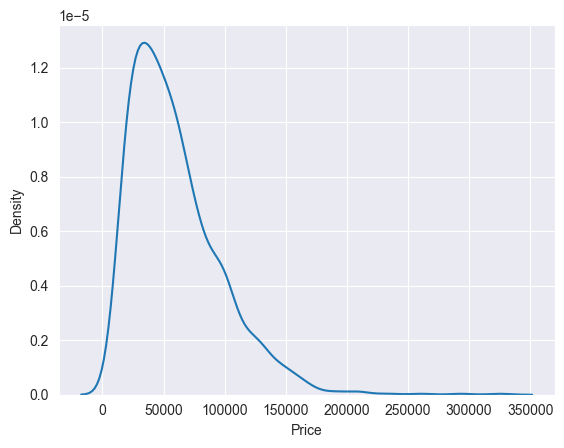

In [340]:
sns.distplot(df['Price'], hist=False)

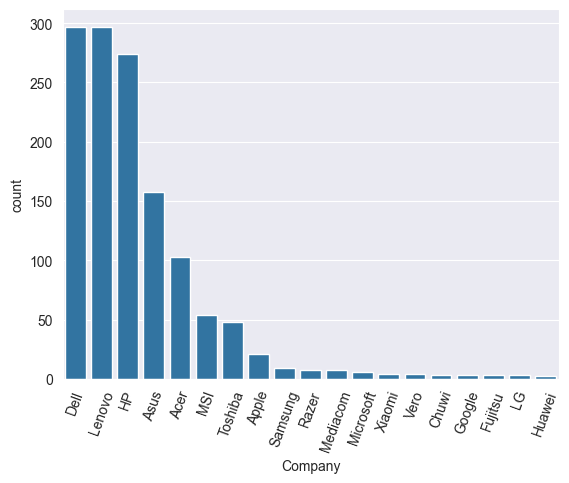

In [341]:
sns.barplot(df['Company'].value_counts())
plt.xticks(rotation=70)
plt.show()

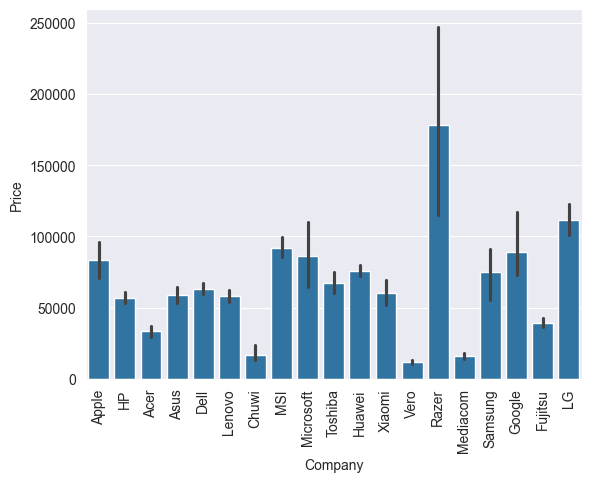

In [342]:
sns.barplot(data = df , x='Company', y='Price')
plt.xticks(rotation=90)
plt.show()

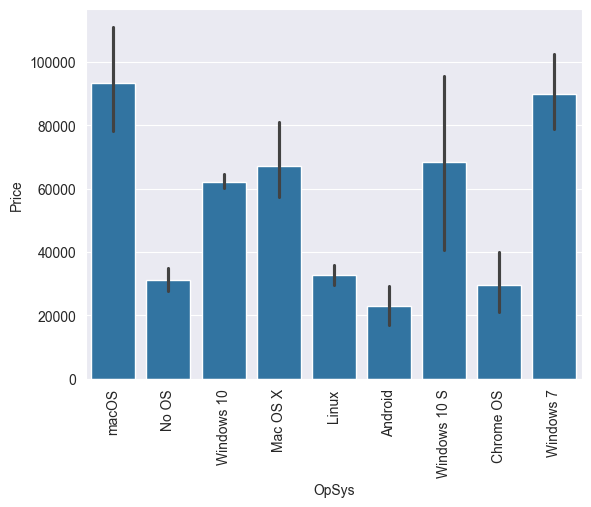

In [343]:
sns.barplot(data = df , x='OpSys', y='Price')
plt.xticks(rotation=90)
plt.show()

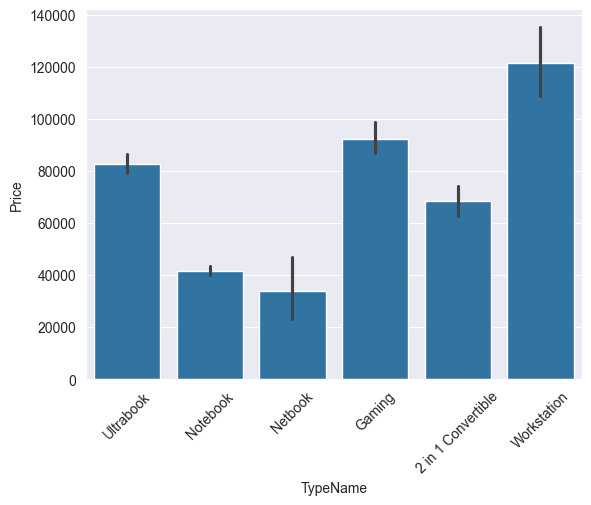

In [344]:
sns.barplot(data = df , x='TypeName', y='Price')
plt.xticks(rotation=45)
plt.show()

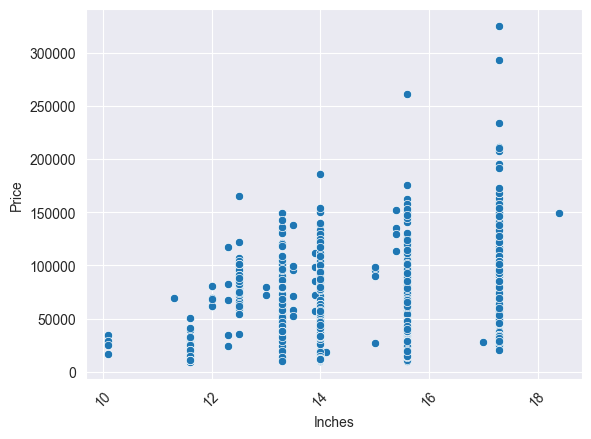

In [345]:
sns.scatterplot(data = df , x='Inches', y='Price')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

## Screen Resolution Column

In [346]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [347]:
df['isTouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['isIPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)
df['is4K'] = df['ScreenResolution'].apply(lambda x:1 if '4K' in x else 0)


<Axes: xlabel='isIPS', ylabel='Price'>

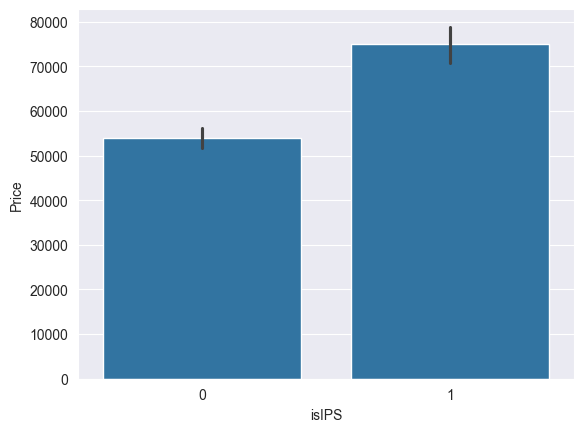

In [348]:
sns.barplot(data = df , x='isIPS', y='Price')

<Axes: xlabel='is4K', ylabel='Price'>

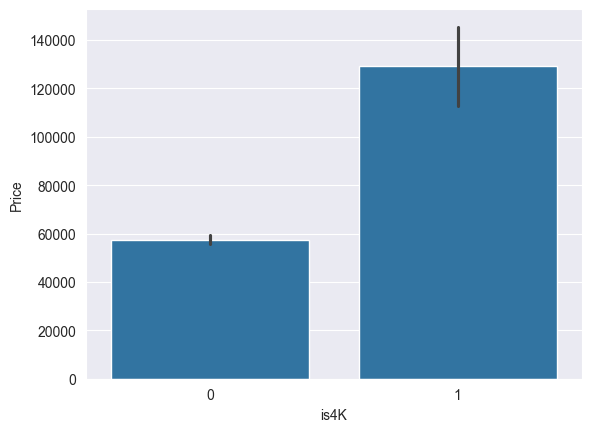

In [349]:
sns.barplot(data = df , x='is4K', y='Price')

<Axes: xlabel='isTouchScreen', ylabel='Price'>

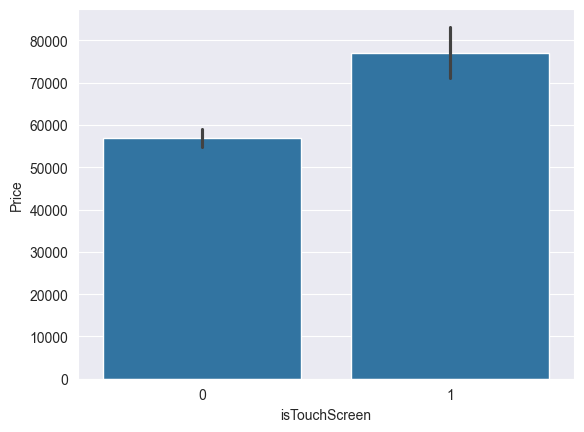

In [350]:
sns.barplot(data = df , x='isTouchScreen', y='Price')

In [351]:
temp_df = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [352]:
temp_df.shape

(1303, 2)

In [353]:
temp_df[0] = temp_df[0].str[-4:]

In [354]:
temp_df.shape

(1303, 2)

In [355]:
df['x_Resolution'] = temp_df[0]
df['y_Resolution'] = temp_df[1]

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  isTouchScreen     1303 non-null   int64  
 12  isIPS             1303 non-null   int64  
 13  is4K              1303 non-null   int64  
 14  x_Resolution      1303 non-null   object 
 15  y_Resolution      1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64

In [357]:
df['x_Resolution'] = df['x_Resolution'].astype('int32')
df['y_Resolution'] = df['y_Resolution'].astype('int32')

In [358]:
df['PPI'] = ((df['x_Resolution']**2 + df['y_Resolution']**2)**0.5)/df['Inches']

In [359]:
df = df.drop(columns=['x_Resolution', 'y_Resolution', 'Inches', 'ScreenResolution'])

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Cpu            1303 non-null   object 
 3   Ram            1303 non-null   int32  
 4   Memory         1303 non-null   object 
 5   Gpu            1303 non-null   object 
 6   OpSys          1303 non-null   object 
 7   Weight         1303 non-null   float32
 8   Price          1303 non-null   float64
 9   isTouchScreen  1303 non-null   int64  
 10  isIPS          1303 non-null   int64  
 11  is4K           1303 non-null   int64  
 12  PPI            1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(3), object(6)
memory usage: 122.3+ KB


In [361]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,isTouchScreen,isIPS,is4K,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005


## CPU Column

In [362]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [363]:
df['Cpu'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))

In [364]:
def Computer_processor(text):
    if 'Intel Core i5' == text or 'Intel Core i7' == text or 'Intel Core i3' == text :
        return text
    elif text.split()[0] == 'Intel' :
        return 'Other Intel Processor'
    else :
        return 'AMD Processor' 

In [365]:
df['Processor'] = df['Cpu'].apply(Computer_processor)

In [366]:
df = df.drop(columns='Cpu')

In [367]:
df['Processor'].value_counts()

Processor
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

In [368]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,isTouchScreen,isIPS,is4K,PPI,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5


<Axes: xlabel='Processor', ylabel='Price'>

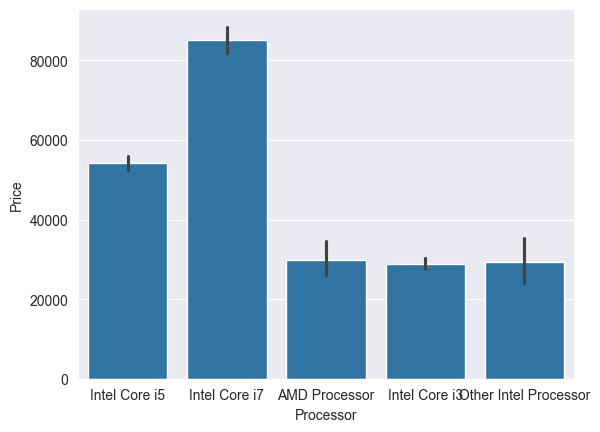

In [369]:
sns.barplot(data = df , x='Processor', y='Price')

## Memory Column

In [370]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [371]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [372]:
def extract_number_before_target(text, target):
    pattern = fr"(\d+)\s{re.escape(target)}"
    match = re.search(pattern, text)
    if match:
        return match.group(1)
    return 0

In [373]:
df['SSD'] = df['Memory'].apply(lambda x: extract_number_before_target(x, target='SSD'))
df['HDD'] = df['Memory'].apply(lambda x: extract_number_before_target(x, target='HDD'))
df['Flash_Storage'] = df['Memory'].apply(lambda x: extract_number_before_target(x, target='Flash'))
df['Hybrid'] = df['Memory'].apply(lambda x: extract_number_before_target(x, target='Hybrid'))

In [374]:
df= df.drop(columns='Memory')

In [375]:
df['HDD'] = df['HDD'].astype('int32')
df['SSD'] = df['SSD'].astype('int32')
df['Hybrid'] = df['Hybrid'].astype('int32')
df['Flash_Storage'] = df['Flash_Storage'].astype('int32')

In [376]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,isTouchScreen,isIPS,is4K,PPI,Processor,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,256,0,0,0


## GPU Column

In [377]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [378]:
def GPU_determination(text): 
    if 'Intel' in text :
        return 'Intel'
    elif 'Nvidia' in text:
        return 'Nvidia'
    else :
        return 'AMD' 

In [379]:
# df['Graphics_Intel'] = df['Gpu'].apply(lambda x:1 if 'Intel' in x else 0)
# df['Graphics_Nvidia'] = df['Gpu'].apply(lambda x:1 if 'Nvidia' in x else 0)
# df['Graphics_AMD'] = df['Gpu'].apply(lambda x:1 if 'AMD' in x else 0)
df['Gpu Brand'] = df['Gpu'].apply(GPU_determination)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float32
 6   Price          1303 non-null   float64
 7   isTouchScreen  1303 non-null   int64  
 8   isIPS          1303 non-null   int64  
 9   is4K           1303 non-null   int64  
 10  PPI            1303 non-null   float64
 11  Processor      1303 non-null   object 
 12  SSD            1303 non-null   int32  
 13  HDD            1303 non-null   int32  
 14  Flash_Storage  1303 non-null   int32  
 15  Hybrid         1303 non-null   int32  
 16  Gpu Brand      1303 non-null   object 
dtypes: float32(1), float64(2), int32(5), int64(3), objec

In [381]:
df = df.drop(columns='Gpu')

In [382]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,isTouchScreen,isIPS,is4K,PPI,Processor,SSD,HDD,Flash_Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,128,0,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,0,141.211998,Intel Core i5,256,0,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,512,0,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,256,0,0,0,Intel


## Operating System Column

In [383]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [384]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [385]:
df['Os'] = df['OpSys'].apply(cat_os)

In [386]:
df = df.drop(columns='OpSys')

In [387]:
df.head()

,Company,TypeName,Ram,Weight,Price,isTouchScreen,isIPS,is4K,PPI,Processor,SSD,HDD,Flash_Storage,Hybrid,Gpu Brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,128,0,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,128,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,0,141.211998,Intel Core i5,256,0,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,512,0,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,256,0,0,0,Intel,Mac


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Weight         1303 non-null   float32
 4   Price          1303 non-null   float64
 5   isTouchScreen  1303 non-null   int64  
 6   isIPS          1303 non-null   int64  
 7   is4K           1303 non-null   int64  
 8   PPI            1303 non-null   float64
 9   Processor      1303 non-null   object 
 10  SSD            1303 non-null   int32  
 11  HDD            1303 non-null   int32  
 12  Flash_Storage  1303 non-null   int32  
 13  Hybrid         1303 non-null   int32  
 14  Gpu Brand      1303 non-null   object 
 15  Os             1303 non-null   object 
dtypes: float32(1), float64(2), int32(5), int64(3), object(5)
memory usage: 132.5+ KB


In [389]:
df = df.drop(columns=['Flash_Storage', 'Hybrid', 'is4K'])

# Preparing Data For Algorithm

## Train Test Splitting 

In [390]:
x = df.drop(columns='Price')
y= np.log(df['Price'])

In [391]:
train_x, test_x, train_y, test_y = split(x, y, test_size=0.15, random_state=2)

## Column Transformation and PipeLine Initialising 

In [392]:
transformer = ColumnTransformer(transformers=[
     ('step_1', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName',  'Processor', 'Os', 'Gpu Brand'])
],remainder='passthrough')

In [393]:
pipe = Pipeline([
    ('first', transformer),
    ('second', LinearRegression())
])

In [394]:
pipe.fit(train_x, train_y)
y_pred = pipe.predict(test_x)
r2_score(y_pred, test_y)

0.7588378480519518

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Weight         1303 non-null   float32
 4   Price          1303 non-null   float64
 5   isTouchScreen  1303 non-null   int64  
 6   isIPS          1303 non-null   int64  
 7   PPI            1303 non-null   float64
 8   Processor      1303 non-null   object 
 9   SSD            1303 non-null   int32  
 10  HDD            1303 non-null   int32  
 11  Gpu Brand      1303 non-null   object 
 12  Os             1303 non-null   object 
dtypes: float32(1), float64(2), int32(3), int64(2), object(5)
memory usage: 112.1+ KB


In [396]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10),
    'Lasso Regression': Lasso(alpha=0.001),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=3),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=8),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=15,learning_rate=1.0),
    'Extra Trees Regressor': ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15),
    'Support Vector Regressor': SVR(kernel='rbf',C=10000,epsilon=0.1)
}

In [397]:
df = df.drop(columns=['Hybrid', 'Flash_Storage'])

KeyError: "['Hybrid', 'Flash_Storage'] not found in axis"

In [ ]:
def Prediction_of_Model():
    for name, model in models.items():
        pip = Pipeline([
            ('first', transformer),
            ('second', model)
        ])
        pip.fit(train_x, train_y)
        new_y = pip.predict(test_x)
        print(f'{name}----', r2_score(y_pred, test_y), ' error : ', mean_absolute_error(test_y,y_pred))

In [398]:
Prediction_of_Model()

Linear Regression---- 0.7588378480519518  error :  0.20943405251798525
Ridge Regression---- 0.7588378480519518  error :  0.20943405251798525
Lasso Regression---- 0.7588378480519518  error :  0.20943405251798525
K-Neighbors Regressor---- 0.7588378480519518  error :  0.20943405251798525
Decision Tree Regressor---- 0.7588378480519518  error :  0.20943405251798525
Random Forest Regressor---- 0.7588378480519518  error :  0.20943405251798525
Gradient Boosting Regressor---- 0.7588378480519518  error :  0.20943405251798525
AdaBoost Regressor---- 0.7588378480519518  error :  0.20943405251798525
Extra Trees Regressor---- 0.7588378480519518  error :  0.20943405251798525
Support Vector Regressor---- 0.7588378480519518  error :  0.20943405251798525


In [399]:
df.head()

,Company,TypeName,Ram,Weight,Price,isTouchScreen,isIPS,PPI,Processor,SSD,HDD,Gpu Brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Weight         1303 non-null   float32
 4   Price          1303 non-null   float64
 5   isTouchScreen  1303 non-null   int64  
 6   isIPS          1303 non-null   int64  
 7   PPI            1303 non-null   float64
 8   Processor      1303 non-null   object 
 9   SSD            1303 non-null   int32  
 10  HDD            1303 non-null   int32  
 11  Gpu Brand      1303 non-null   object 
 12  Os             1303 non-null   object 
dtypes: float32(1), float64(2), int32(3), int64(2), object(5)
memory usage: 112.1+ KB


In [401]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName',  'Processor', 'Os', 'Gpu Brand'])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('knn',  KNeighborsRegressor(n_neighbors=3))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(train_x,train_y)

y_pred = pipe.predict(test_x)

print('R2 score',r2_score(test_y,y_pred))
print('MAE',mean_absolute_error(test_y,y_pred))

R2 score 0.880348343561797
MAE 0.16787406548302322


# Pickle Dumping

In [402]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))
pickle.dump(train_x, open('train.pkl', 'wb'))
pickle.dump(train_x, open('df.pkl', 'wb'))

In [403]:
train_x.head(1)

,Company,TypeName,Ram,Weight,isTouchScreen,isIPS,PPI,Processor,SSD,HDD,Gpu Brand,Os
183,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,128,0,Intel,Windows


In [404]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 248 to 471
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        196 non-null    object 
 1   TypeName       196 non-null    object 
 2   Ram            196 non-null    int32  
 3   Weight         196 non-null    float32
 4   isTouchScreen  196 non-null    int64  
 5   isIPS          196 non-null    int64  
 6   PPI            196 non-null    float64
 7   Processor      196 non-null    object 
 8   SSD            196 non-null    int32  
 9   HDD            196 non-null    int32  
 10  Gpu Brand      196 non-null    object 
 11  Os             196 non-null    object 
dtypes: float32(1), float64(1), int32(3), int64(2), object(5)
memory usage: 16.8+ KB


In [405]:
# test_array1 = pd.DataFrame(['Toshiba', 'Notebook', 8, 2.0, 0, 0, 0, 100.45467, 'Intel Core i5', 128, 0, 0, 0, 'AMD', 'Windows'])

In [406]:
# Assuming 'train_x' has been defined and has the correct column names and data types

# Create test_array1 with the same structure as train_x
test_array1 = pd.DataFrame([['Toshiba', 'Notebook', 8, 2.0, 0, 0, 100.45467, 'Intel Core i5', 128, 0, 'AMD', 'Windows']],
                           columns=train_x.columns)
print(test_array1.info())
# Make a prediction
prediction = pipe.predict(test_array1)
print(np.exp(prediction)[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1 non-null      object 
 1   TypeName       1 non-null      object 
 2   Ram            1 non-null      int64  
 3   Weight         1 non-null      float64
 4   isTouchScreen  1 non-null      int64  
 5   isIPS          1 non-null      int64  
 6   PPI            1 non-null      float64
 7   Processor      1 non-null      object 
 8   SSD            1 non-null      int64  
 9   HDD            1 non-null      int64  
 10  Gpu Brand      1 non-null      object 
 11  Os             1 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 228.0+ bytes
None
40287.043078680465


In [407]:
type(test_array1)

pandas.core.frame.DataFrame

In [408]:
test_array1

,Company,TypeName,Ram,Weight,isTouchScreen,isIPS,PPI,Processor,SSD,HDD,Gpu Brand,Os
0,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,128,0,AMD,Windows


In [409]:
test_array2 = train_x.head(1)

In [410]:
type(test_array2)

pandas.core.frame.DataFrame

In [411]:
test_array2

,Company,TypeName,Ram,Weight,isTouchScreen,isIPS,PPI,Processor,SSD,HDD,Gpu Brand,Os
183,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,128,0,Intel,Windows


In [412]:
pipe.predict(test_array1)

array([10.60378518])

In [413]:
np.exp(pipe.predict(test_array2)[0])

np.float64(42420.98615755116)